 1. What is unsupervised learning in the context of machine learning

=> Unsupervised learning = Discovering structure in unlabeled data.

2. How does K-Means clustering algorithm work

=> You must choose K manually.

Sensitive to initial centroid positions.

Struggles with non-spherical clusters or outliers

3.  Explain the concept of a dendrogram in hierarchical clustering

=> X-axis → Data points (or cluster labels)

Y-axis → Distance (or dissimilarity) between clusters when they are merged

4. What is the main difference between K-Means and Hierarchical Clustering

=> K-Means: You decide beforehand — “I want 3 groups.” Then, you assign and re-adjust students until each group has similar skills.

=> Hierarchical Clustering: You start by pairing the most similar students, then merge those pairs step by step until everyone is in one big group — and you can choose where to stop merging.

5. What are the advantages of DBSCAN over K-Means

=> K-Means: Groups data into K clusters based on distance from centroids (spherical clusters).

=>  DBSCAN: Groups data based on density — regions with many nearby points form clusters, while sparse regions are treated as noise/outliers.

6. When would you use Silhouette Score in clustering

=> Use the Silhouette Score to measure how well your clustering algorithm separated the data — and to find the best number of clusters (K).

7.  What are the limitations of Hierarchical Clustering

=> Hierarchical clustering will take a long time to build the distance matrix and dendrogram.

Even small changes in data can change the entire hierarchy.

8. Why is feature scaling important in clustering algorithms like K-Means

=> Feature scaling is essential in K-Means because it ensures that all features contribute equally to distance calculations — leading to fair, balanced, and accurate clusters.

9. How does DBSCAN identify noise points

=> DBSCAN’s ability to automatically detect noise is one of its biggest advantages over K-Means, which forces every point into a cluster — even if it doesn’t belong anywhere.

10. Define inertia in the context of K-Means

=> In the context of K-Means clustering, inertia is a measure of how internally coherent the clusters are —
that is, how close the data points are to their respective cluster centers (centroids).

11. What is the elbow method in K-Means clustering

=> Increasing K always reduces inertia, but beyond a certain point,
the gain (reduction in inertia) becomes insignificant.

The elbow point balances:

Low inertia (tight clusters)

Simplicity (fewer clusters)

12.  Describe the concept of "density" in DBSCAN

=> DBSCAN defines clusters as dense areas separated by low-density regions —
it doesn’t need predefined K, and it can detect arbitrary-shaped clusters and outliers naturally.

13. Can hierarchical clustering be used on categorical data

=> but you must use appropriate distance (similarity) measures — because Euclidean distance (used for numerical data) doesn’t work for categorical features.

14.  What does a negative Silhouette Score indicate

=> | Silhouette Score | Interpretation                                   
=>
| **> 0.5**        | Good, well-separated clusters                    
=>| **≈ 0**          | Overlapping clusters                            
=> | **< 0**          | Misclassified points or wrong number of clusters


15.  Explain the term "linkage criteria" in hierarchical clustering

| Term                  | Meaning                                                    |
| --------------------- | ---------------------------------------------------------- |
| **Linkage Criterion** | Rule that decides how to measure distance between clusters |
| **Purpose**           | Determines which clusters merge next                       |
| **Common Types**      | Single, Complete, Average, Centroid, Ward                  |
| **Effect**            | Influences cluster shapes and dendrogram structure         |


16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities

=> K-Means assumes all clusters are spherical, equally sized, and equally dense.
When that assumption fails, it misclassifies points, giving poor results.

17.  What are the core parameters in DBSCAN, and how do they influence clustering

=> (Epsilon) — Neighborhood radius

minPts (Minimum Points) — Minimum number of points required to form a dense region

18. How does K-Means++ improve upon standard K-Means initialization

=> from sklearn.cluster import KMeans

# Standard K-Means
kmeans1 = KMeans(n_clusters=3, init='random', random_state=42)

# K-Means++
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42)


19. What is agglomerative clustering

=> The height of each merge represents the distance between clusters.

By cutting the dendrogram at a chosen height, you can decide how many clusters to keep.

20. What makes Silhouette Score a better metric than just inertia for model evaluation

=> Silhouette Score = Compactness  + Separation
Inertia = Compactness only

21.  Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot

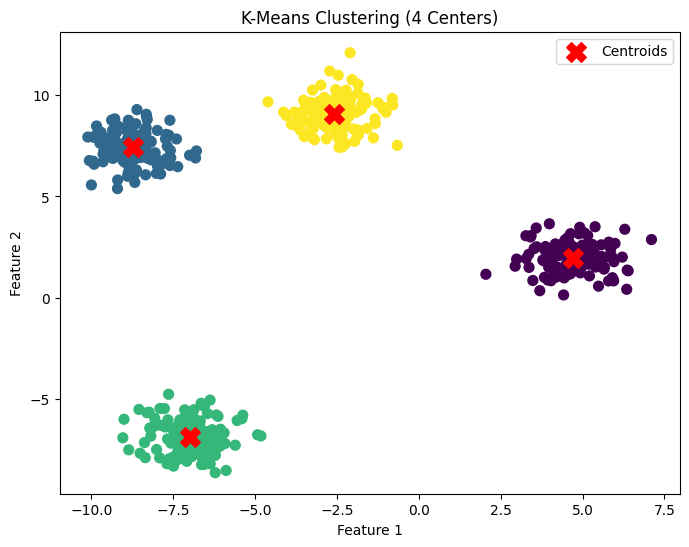

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=0.8,
                  random_state=42)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering (4 Centers)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels

In [10]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X)

print("First 10 predicted cluster labels:")
print(labels[:10])


First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

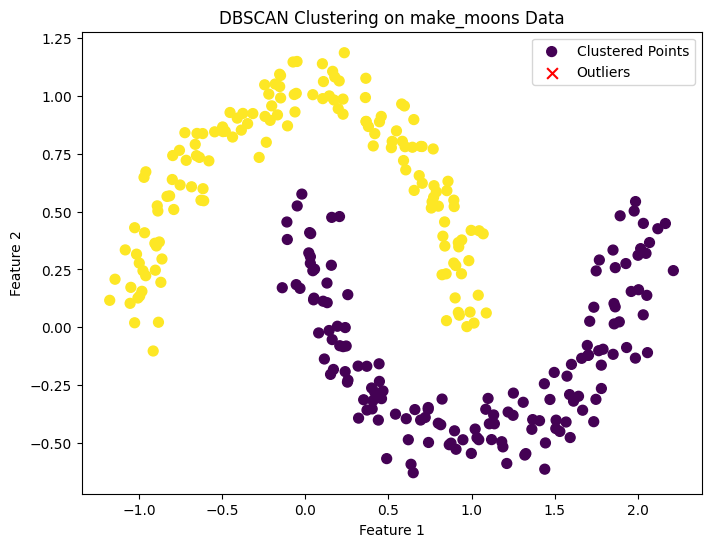

In [12]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.08, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

core_samples_mask = (labels != -1)
outliers_mask = (labels == -1)

plt.figure(figsize=(8,6))
plt.scatter(X[core_samples_mask, 0], X[core_samples_mask, 1],
            c=labels[core_samples_mask], cmap='viridis', s=50, label='Clustered Points')

plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1],
            c='red', s=60, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


24.  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster

In [14]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for cluster_id, size in zip(unique, counts):
    print(f"Cluster {cluster_id}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result


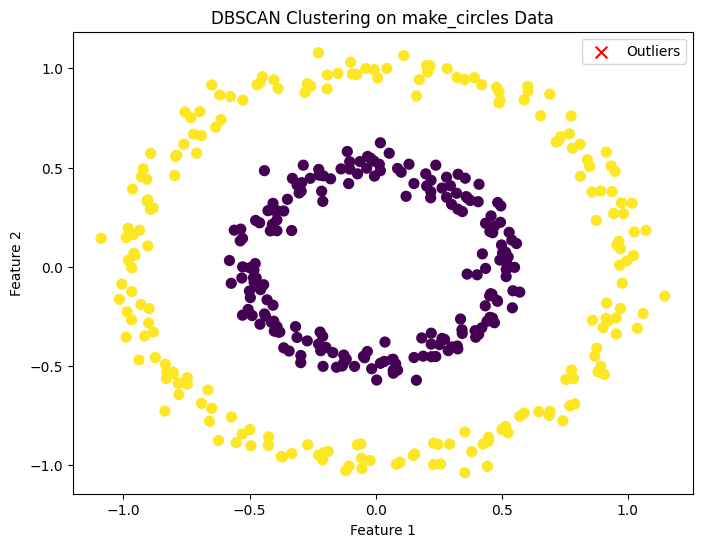

In [15]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.15, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

outliers = (labels == -1)
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=70, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


26.  Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

data = load_breast_cancer()
X = data.data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=data.feature_names)

print("Cluster Centroids (after MinMax scaling):")
print(centroids_df)


Cluster Centroids (after MinMax scaling):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst f

27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN

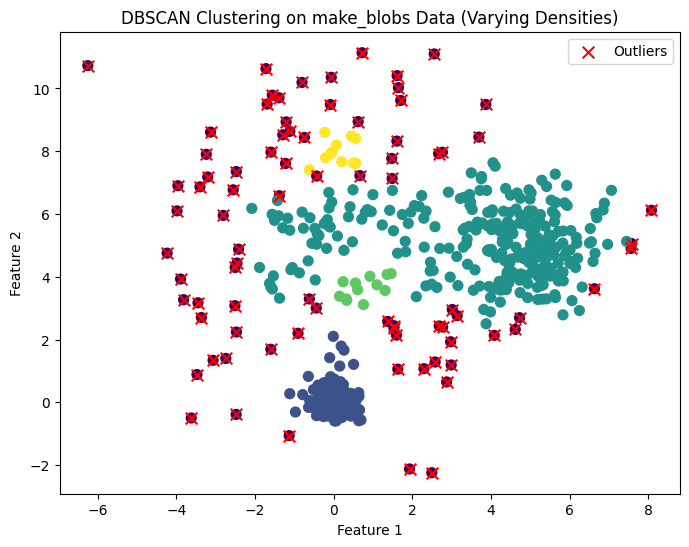

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=600,
                  centers=[[0, 0], [5, 5], [0, 5]],
                  cluster_std=[0.3, 1.0, 2.5],
                  random_state=42)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

outliers = (labels == -1)
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', s=70, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on make_blobs Data (Varying Densities)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


28.  Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

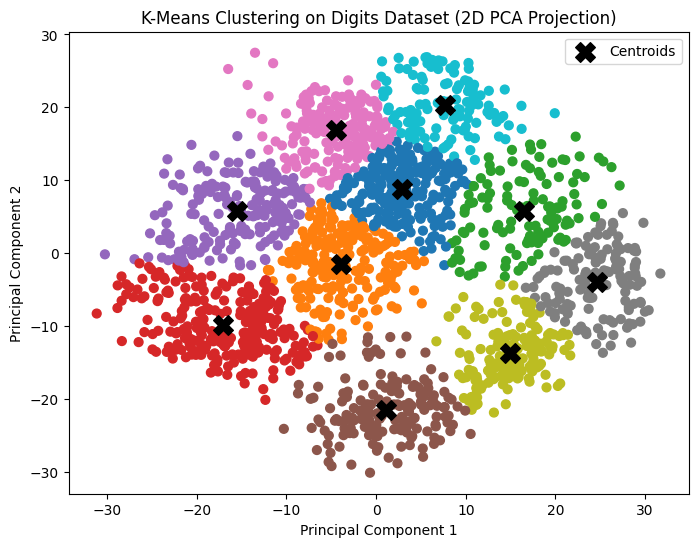

In [19]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering on Digits Dataset (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

k = 2, Silhouette Score = 0.619
k = 3, Silhouette Score = 0.802
k = 4, Silhouette Score = 0.876
k = 5, Silhouette Score = 0.750


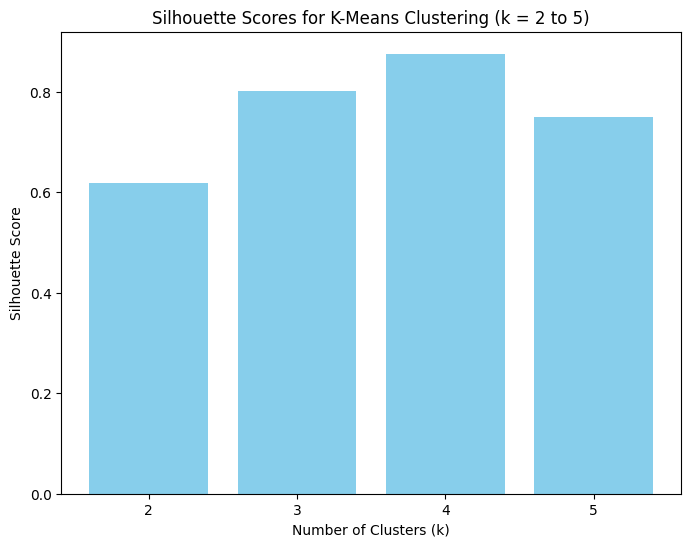

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

silhouette_scores = []

for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.3f}")

plt.figure(figsize=(8,6))
plt.bar(range(2, 6), silhouette_scores, color='skyblue')
plt.title("Silhouette Scores for K-Means Clustering (k = 2 to 5)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 6))
plt.show()


30.  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

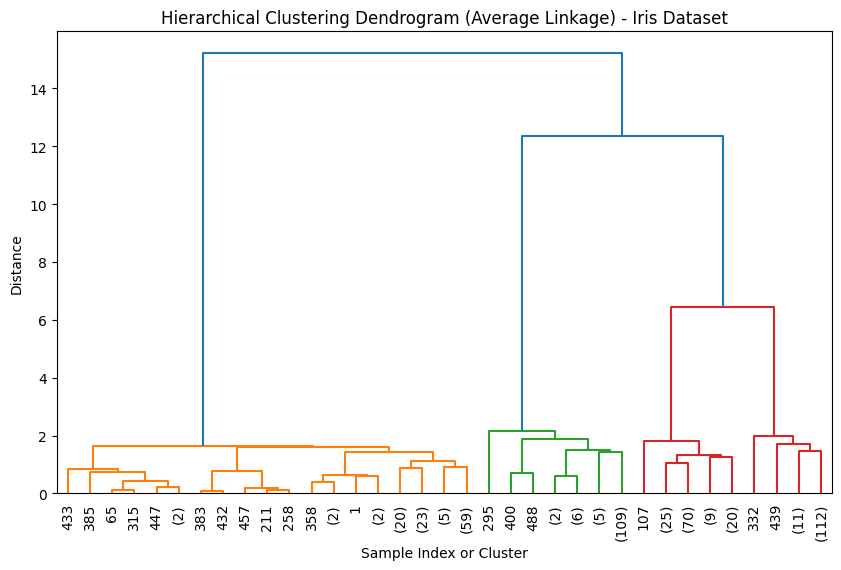

In [21]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

iris = load_iris()

Z = linkage(X, method='average')

plt.figure(figsize=(10, 6))
dendrogram(Z,
           truncate_mode='level',
           p=5,
           leaf_rotation=90,
           leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage) - Iris Dataset")
plt.xlabel("Sample Index or Cluster")
plt.ylabel("Distance")
plt.show()


31.  Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries

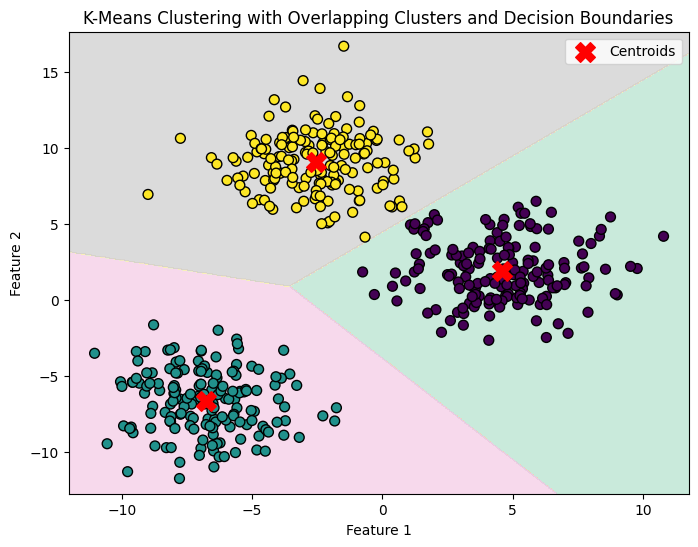

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500,
                  centers=3,
                  cluster_std=2.0,
                  random_state=42)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='Pastel2', alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering with Overlapping Clusters and Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

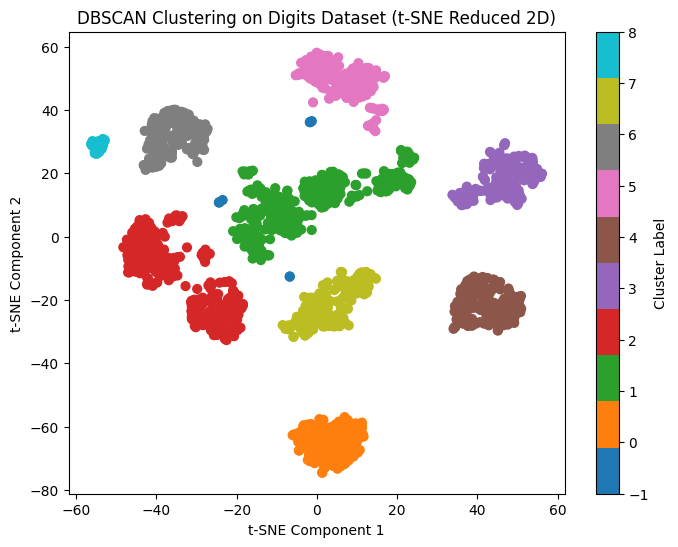

Number of clusters found: 9


In [23]:

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X)

dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=40)
plt.title("DBSCAN Clustering on Digits Dataset (t-SNE Reduced 2D)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")


33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result

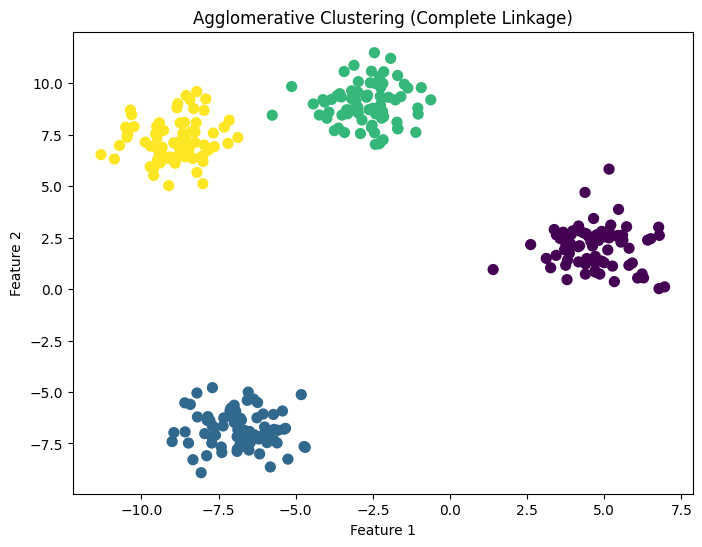

In [24]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300,
                  centers=4,
                  cluster_std=1.0,
                  random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


34.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot

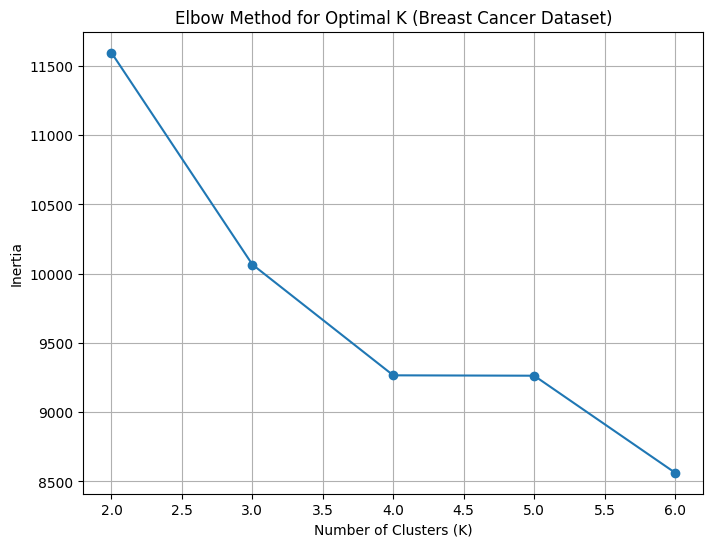

K = 2, Inertia = 11595.68
K = 3, Inertia = 10066.28
K = 4, Inertia = 9266.15
K = 5, Inertia = 9263.40
K = 6, Inertia = 8562.88


In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia_values = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(k_values, inertia_values, marker='o')
plt.title("Elbow Method for Optimal K (Breast Cancer Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

for k, inertia in zip(k_values, inertia_values):
    print(f"K = {k}, Inertia = {inertia:.2f}")


35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage

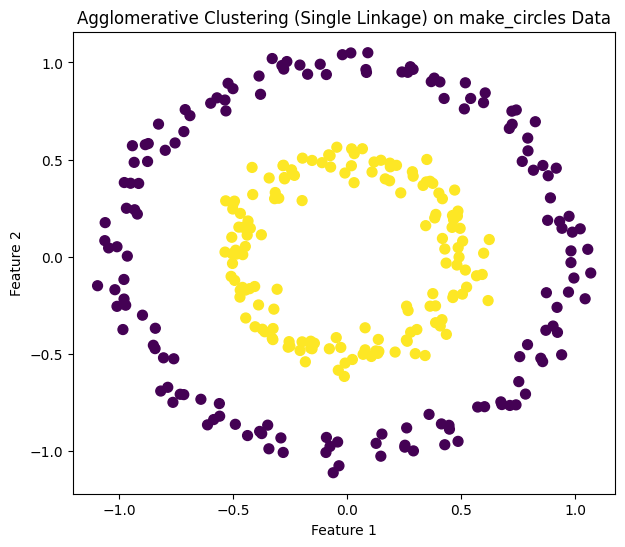

In [26]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (Single Linkage) on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


36.  Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise6

In [28]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of clusters found (excluding noise): 0
Number of noise points: 178


37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points

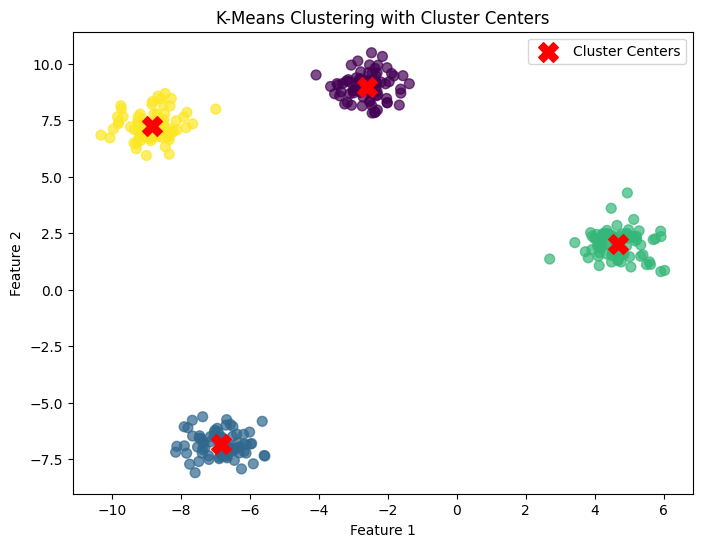

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [31]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_noise = list(labels).count(-1)

print(f"Number of samples identified as noise: {n_noise}")


Number of samples identified as noise: 4


39.  Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result

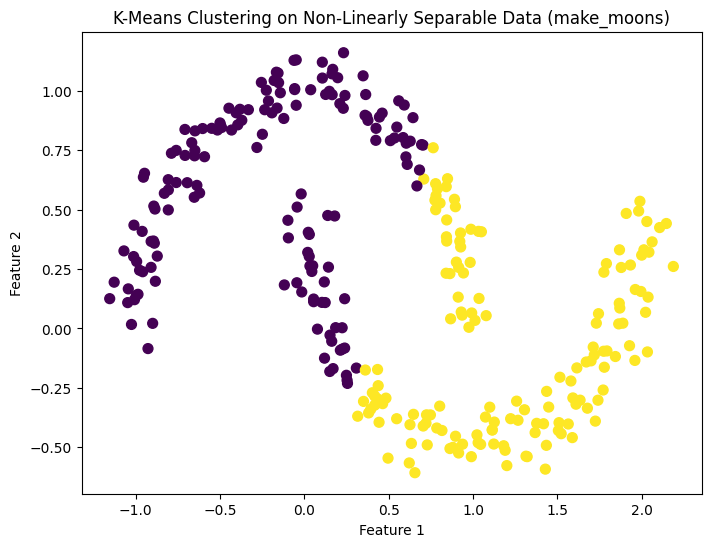

In [32]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=300, noise=0.07, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("K-Means Clustering on Non-Linearly Separable Data (make_moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot

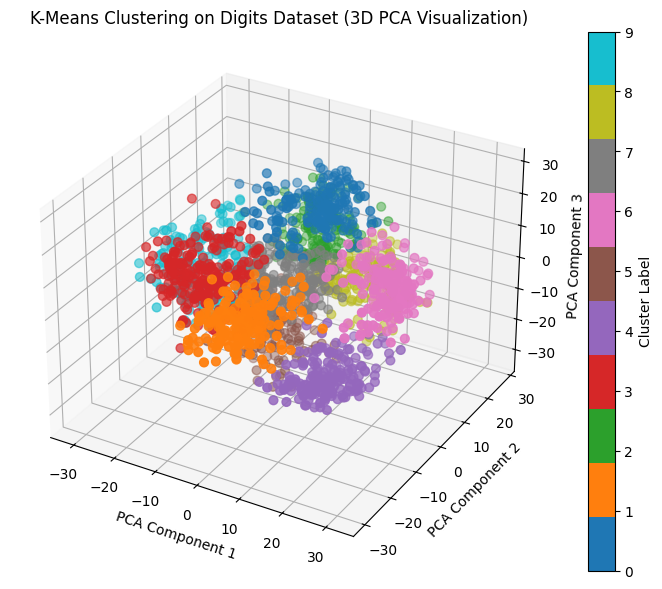

In [33]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
digits = load_digits()
X = digits.data

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    X_pca[:, 2],
    c=labels,
    cmap='tab10',
    s=40
)

ax.set_title("K-Means Clustering on Digits Dataset (3D PCA Visualization)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

plt.colorbar(scatter, label="Cluster Label")
plt.show()


41.  Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering

Silhouette Score: 0.766


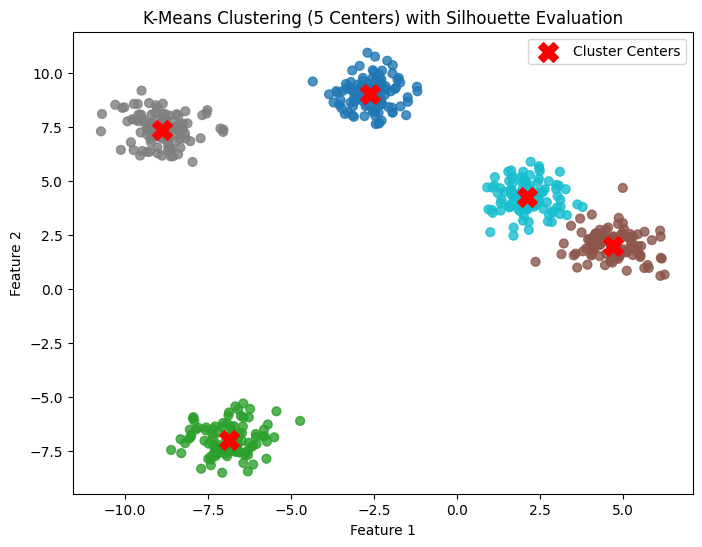

In [34]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.7, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print(f"Silhouette Score: {score:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=40, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Cluster Centers')
plt.title("K-Means Clustering (5 Centers) with Silhouette Evaluation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D

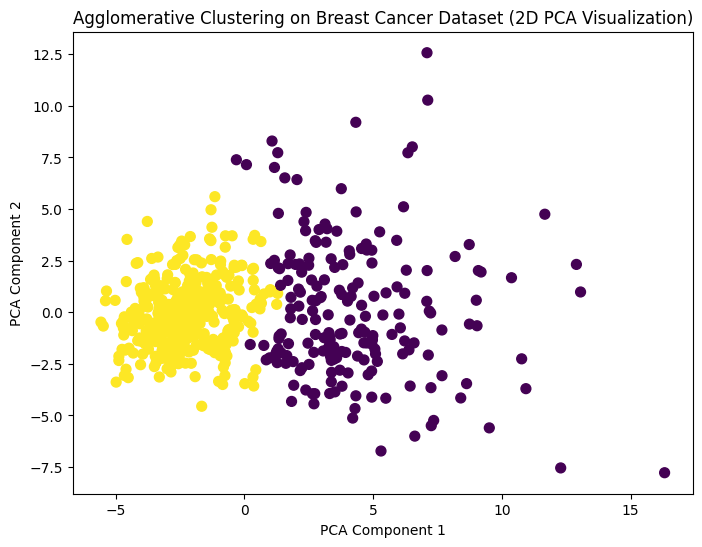

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agg.fit_predict(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (2D PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


43.  Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side

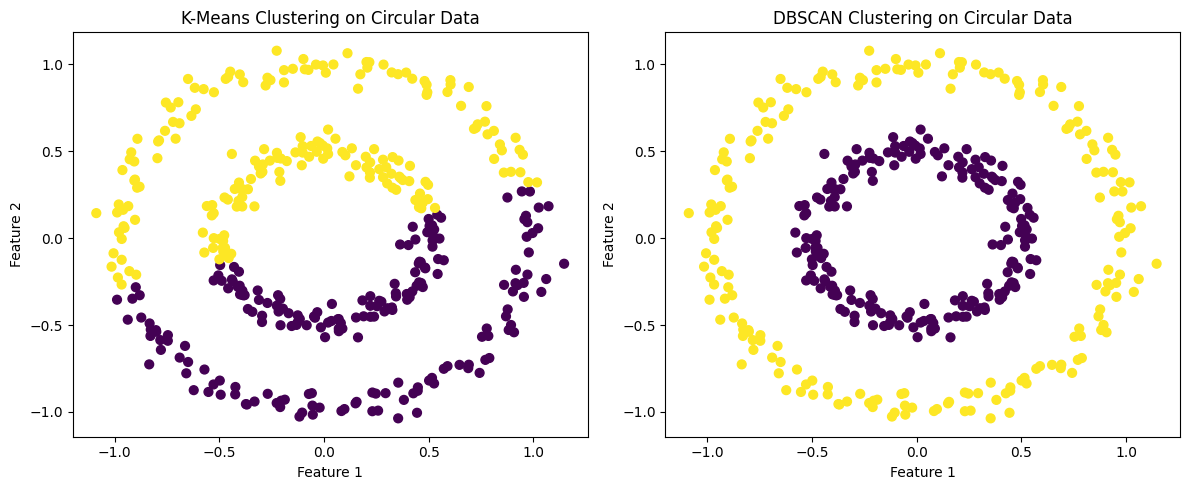

In [36]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=40)
plt.title("K-Means Clustering on Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=40)
plt.title("DBSCAN Clustering on Circular Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

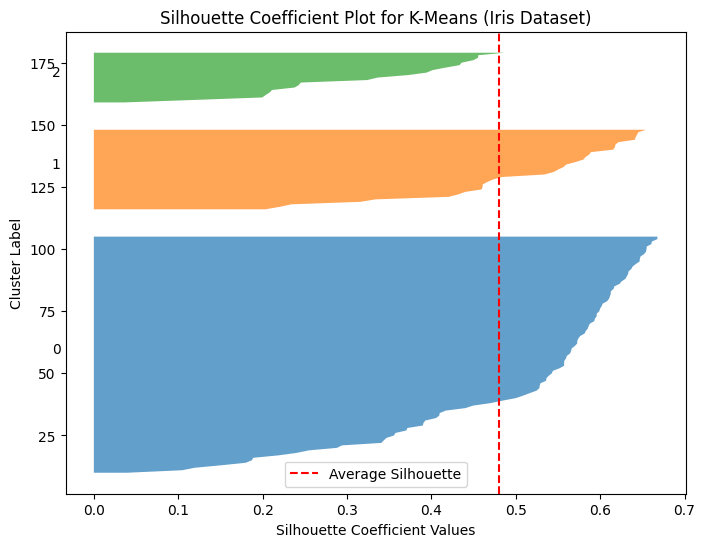

Average Silhouette Score: 0.480


In [37]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

data = load_iris()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

silhouette_vals = silhouette_samples(X_scaled, labels)
avg_silhouette = silhouette_score(X_scaled, labels)

plt.figure(figsize=(8,6))
y_lower = 10

for i in range(3):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
    y_lower = y_upper + 10

plt.axvline(x=avg_silhouette, color="red", linestyle="--", label="Average Silhouette")
plt.title("Silhouette Coefficient Plot for K-Means (Iris Dataset)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.legend()
plt.show()

print(f"Average Silhouette Score: {avg_silhouette:.3f}")


45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters

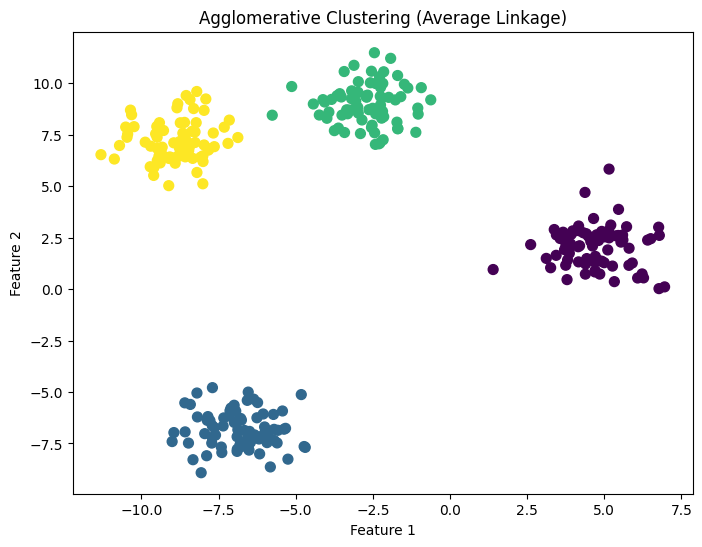

In [39]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


46.  Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count

Number of clusters found: 3
Number of noise points: 41


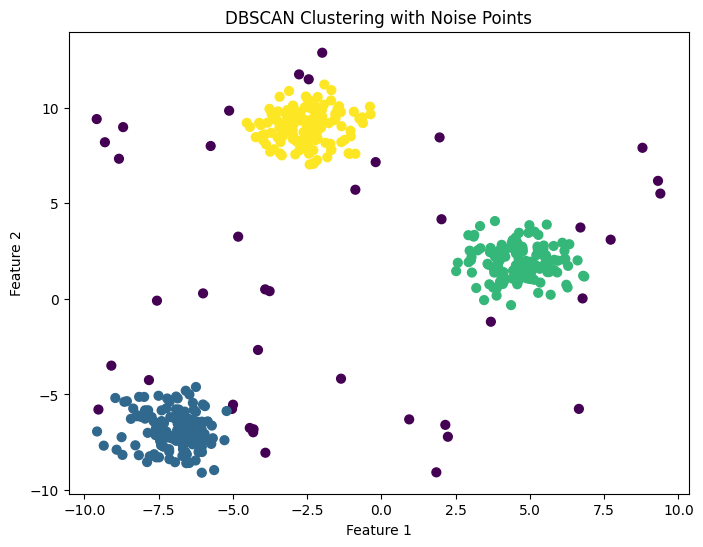

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)

rng = np.random.RandomState(42)
noise = rng.uniform(low=-10, high=10, size=(30, 2))
X = np.vstack([X, noise])

dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Step 5: Visualize results
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=40)
plt.title("DBSCAN Clustering with Noise Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


47.  Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the
clusters

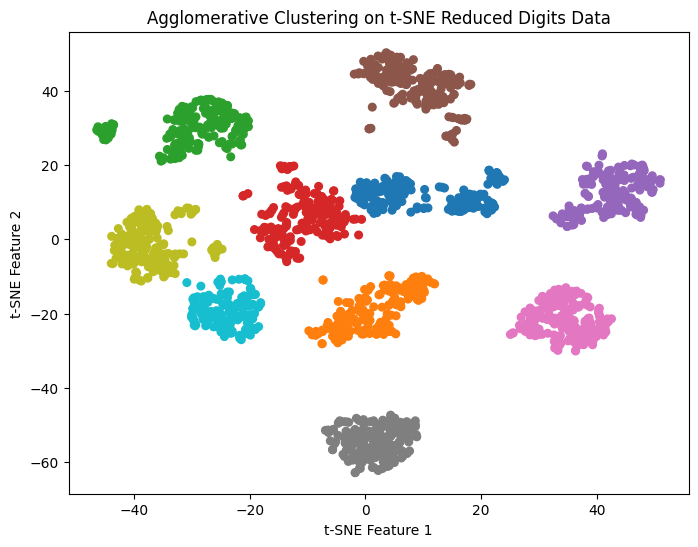

In [43]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agg.fit_predict(X_embedded)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=labels, cmap='tab10', s=30)
plt.title("Agglomerative Clustering on t-SNE Reduced Digits Data")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()
